In [1]:
import string 
import re 
from numpy import array, argmax, random, take 
import pandas as pd 
import matplotlib.pyplot as plt 
% matplotlib inline 
pd.set_option('display.max_colwidth', 200)
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Gaurav\Downloads\price-volume-data-for-all-us-stocks-etfs\Data\Stocks\aapl.us.txt")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
8359,2017-11-06,171.75,174.36,171.10,173.63,34901241,0
8360,2017-11-07,173.29,174.51,173.29,174.18,24424877,0
8361,2017-11-08,174.03,175.61,173.71,175.61,24451166,0
8362,2017-11-09,174.48,175.46,172.52,175.25,29533086,0
8363,2017-11-10,175.11,175.38,174.27,174.67,25130494,0


In [5]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,8364.000000,8364.000000,8364.000000,8364.000000,8.364000e+03,8364.0
mean,22.284350,22.495867,22.054244,22.281018,1.066416e+08,0.0
std,37.763402,38.057733,37.447432,37.764469,9.935187e+07,0.0
min,0.233050,0.235640,0.230510,0.230510,0.000000e+00,0.0
25%,1.137100,1.164200,1.112800,1.137100,4.384365e+07,0.0
50%,1.632800,1.663400,1.600600,1.628250,7.481383e+07,0.0
75%,23.739000,23.930500,23.335750,23.694500,1.320534e+08,0.0
max,175.110000,175.610000,174.270000,175.610000,2.069770e+09,0.0


In [6]:
df.shape

(8364, 7)

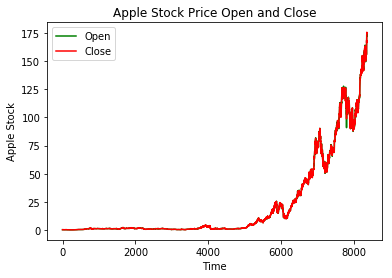

In [7]:
plt.plot(df['Open'], color = 'green', label = 'Open')
plt.plot(df['Close'], color = 'red', label = 'Close')
plt.title('Apple Stock Price Open and Close')
plt.xlabel('Time')
plt.ylabel('Apple Stock')
plt.legend()
plt.show()

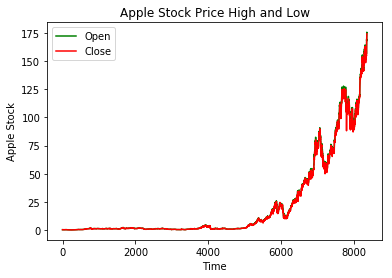

In [8]:
plt.plot(df['High'], color = 'green', label = 'Open')
plt.plot(df['Low'], color = 'red', label = 'Close')
plt.title('Apple Stock Price High and Low')
plt.xlabel('Time')
plt.ylabel('Apple Stock')
plt.legend()
plt.show()

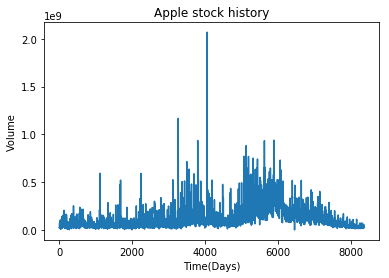

In [9]:
plt.figure()
plt.plot(df["Volume"])
plt.title('Apple stock history')
plt.ylabel('Volume')
plt.xlabel('Time(Days)')
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

train_cols = ["Open","High","Low","Close","Volume"]
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

print("Train size:", len(train_df))
print("Test size:", len(test_df))

Train size: 6691
Test size: 1673


In [11]:
# scale the feature MinMax, build array
X = train_df.loc[:,train_cols].values

min_max_scaler = MinMaxScaler()

X_train = min_max_scaler.fit_transform(X)
X_test = min_max_scaler.transform(test_df.loc[:,train_cols])

#### Intuition for creating a time series from the dataset:

**LSTM layers look at the following inputs:**
- **Time Steps** : number of units of time(in this case, days) that the network must look back to
- **Batch Size** : number of samples of data(rows) that the network looks at per iteration
- **Number of features** 

In this case, the output(Closing price) on a certain day is to be predicted from the features(train_cols) on some number of  previous days(time steps).

So, converting the data to a time series format would mean:
- Choosing the time step
- For each output, creating an input-output pair
- Creating corresponding features and targets

In [12]:
# data: initial dataset(created above)
# output_index: index of target variable(in this case, the closing price)
# time_step: number of days before now that the network must learn from

def get_timeseries(data, output_index, time_step):
    # total number of time-series samples would be (number of samples - time steps)
    no_of_samples = data.shape[0] - time_step
    no_of_features = data.shape[1]
    x = np.zeros((no_of_samples, time_step, no_of_features))
    y = np.zeros((no_of_samples,))
    
# creating the time series dataset
    for i in range(no_of_samples):
        x[i] = data[i:time_step+i]
        y[i] = data[time_step+i, output_index]
    print("length of time-series i/o",x.shape,y.shape)
    return x, y

In [13]:
x_t, y_t = get_timeseries(X_train, 3, 3)

length of time-series i/o (6688, 3, 5) (6688,)
